## Extrae la informacion

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_excel(r"D:\alex_\Documents\Programacion\Bases de datos\Loteria Nacional\MelateRetro\Melate-Retro12022024.xlsx", dtype=object)

## Obten tu df

In [31]:
# premios_a_filtrar = [1200, 5000, 10000]
# df_filtrado = df[~df['PREMIO'].isin(premios_a_filtrar)]
# df_pivot_todos = df_filtrado.pivot_table(index = "ORIGEN",columns="PREMIO", values = "Valor", aggfunc=lambda x: x).reset_index()
# df_pivot_todos["ORIGEN"] = df_pivot_todos["ORIGEN"].str.replace('Mayor', '')

df.head()

,NPRODUCTO,CONCURSO,F1,F2,F3,F4,F5,F6,F7,BOLSA,FECHA
0,30,1398,6,9,26,31,34,37,32,19300000,2024-02-10
1,30,1397,1,5,12,14,26,31,37,17300000,2024-02-06
2,30,1396,4,8,20,29,30,35,14,14700000,2024-02-03
3,30,1395,5,8,17,29,38,39,19,12700000,2024-01-30
4,30,1394,6,8,26,28,31,33,20,10700000,2024-01-27


## Grafica de los mas importantes

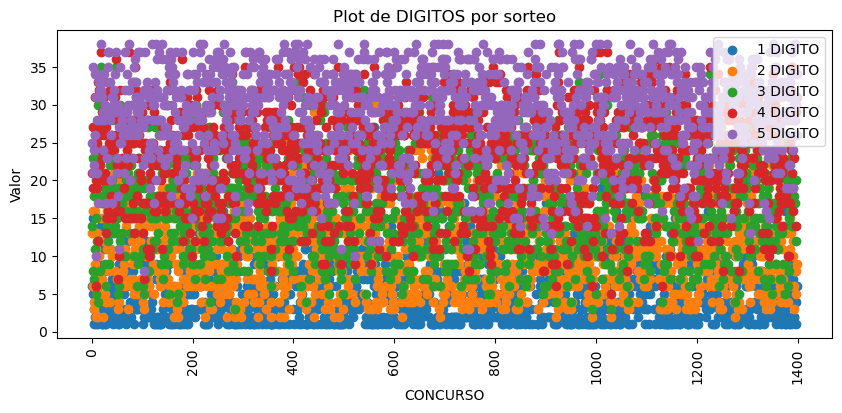

In [4]:
plt.figure(figsize=(10, 4))

plt.scatter(df["CONCURSO"], df["F1"], label = "1 DIGITO")
plt.scatter(df["CONCURSO"], df["F2"], label = "2 DIGITO")
plt.scatter(df["CONCURSO"], df["F3"], label = "3 DIGITO")
plt.scatter(df["CONCURSO"], df["F4"], label = "4 DIGITO")
plt.scatter(df["CONCURSO"], df["F5"], label = "5 DIGITO")


plt.xlabel('CONCURSO')
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.title('Plot de DIGITOS por sorteo')
plt.legend()
plt.show()

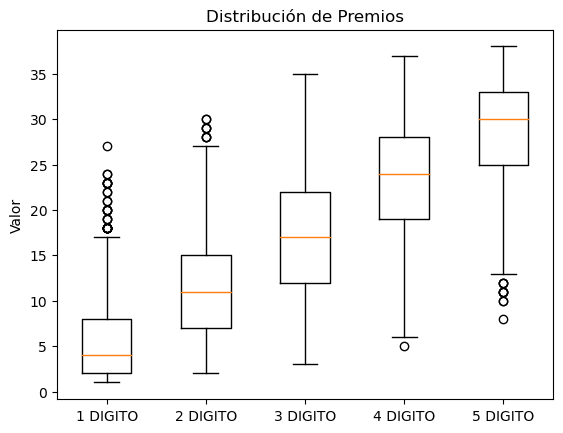

In [5]:
# df_pivot_todos.boxplot(column=[300000, 850000, 7000000])
plt.boxplot([df["F1"], 
             df["F2"],
             df["F3"],
             df["F4"],
             df["F5"],
             ], labels=["1 DIGITO",
                        "2 DIGITO",
                        "3 DIGITO",
                        "4 DIGITO",
                        "5 DIGITO"])

plt.title('Distribución de Premios')
plt.ylabel('Valor')
plt.show()

## Analisis

1. Árboles de Decisión y Bosques Aleatorios:
Pueden adaptarse a patrones no lineales y son robustos frente a datos ruidosos. Los bosques aleatorios, en particular, pueden mejorar la precisión y generalización.
2. Redes Neuronales:
Especialmente las redes neuronales recurrentes (RNN) y las redes neuronales de memoria a largo plazo (LSTM) son eficaces para modelar secuencias temporales y pueden capturar patrones complejos y relaciones no lineales.
3. Modelos de Serie Temporal:
Modelos específicos para series temporales, como ARIMA o modelos LSTM, son diseñados específicamente para la predicción de series temporales y pueden ser efectivos en la identificación de patrones temporales.

In [46]:
df1 = df.iloc[1:80, 1:8]
df1

,CONCURSO,F1,F2,F3,F4,F5,F6
1,1397,1,5,12,14,26,31
2,1396,4,8,20,29,30,35
3,1395,5,8,17,29,38,39
4,1394,6,8,26,28,31,33
5,1393,2,3,18,23,28,29
...,...,...,...,...,...,...,...
75,1323,1,7,13,30,33,34
76,1322,6,22,30,31,33,39
77,1321,3,5,8,21,30,36
78,1320,3,19,23,24,36,38


## Random Forest

In [47]:
df1["CONCURSO"][1]+1

1398

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Crear una lista de los nombres de las columnas de los dígitos
digit_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

#################################################
df_analisis = df1
proximo_premio = df1["CONCURSO"][1]+1 # cORREGIR ACA
#################################################

# Crear un gráfico para cada dígito
for digit_column in digit_columns:
    years = np.array(df_analisis["CONCURSO"].astype(int))
    target_variable = df_analisis[digit_column]

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    rf_model = RandomForestRegressor(n_estimators=200, random_state=1000)
    rf_model.fit(X, y)

    # Predicción para el tiempo futuro
    X_future = np.array([[proximo_premio]])
    y_pred_future = rf_model.predict(X_future)

    # Predicciones del modelo
    y_pred = rf_model.predict(X)

    # # Crear el gráfico
    # plt.figure(figsize=(12, 6))

    # # Variable objetivo real: X
    # plt.scatter(X.flatten(), y, label='Real', color='blue')

    # # Predicciones del modelo de Random Forest
    # plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

    # # Predicción para el tiempo futuro
    # plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

    # plt.xlabel('Año')
    # plt.ylabel('Variable Objetivo')
    # plt.title(f'Random Forest respecto al Tiempo - Dígito {digit_column[-1]}')
    # plt.legend()
    # plt.show()

    print("############")
    print(" ")
    print(f'Predicción para el Digito {digit_column[-1]} Futuro: {y_pred_future[0]}')
    # Desviacion, entre mas cercana a 0 mejor
    mse = mean_squared_error(y , y_pred)
    rmse = sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # R cuadrado entre mas cercano a 1 mejor
    r2 = r2_score(y , y_pred)
    print(f'R^2 Score: {r2}')
    print(" ")



############
 
Predicción para el Digito 1 Futuro: 2.425
Root Mean Squared Error (RMSE): 1.618338830288717
R^2 Score: 0.755251147355654
 
############
 
Predicción para el Digito 2 Futuro: 6.175
Root Mean Squared Error (RMSE): 2.9066001932746617
R^2 Score: 0.7404527071662745
 
############
 
Predicción para el Digito 3 Futuro: 15.31
Root Mean Squared Error (RMSE): 3.0158317491598403
R^2 Score: 0.7423709891980212
 
############
 
Predicción para el Digito 4 Futuro: 19.87
Root Mean Squared Error (RMSE): 2.715257173637028
R^2 Score: 0.7998062526105116
 
############
 
Predicción para el Digito 5 Futuro: 28.33
Root Mean Squared Error (RMSE): 2.4168918344105736
R^2 Score: 0.774126604244114
 
############
 
Predicción para el Digito 6 Futuro: 32.745
Root Mean Squared Error (RMSE): 1.9041218614603266
R^2 Score: 0.8412591775637338
 


## ARMA

In [64]:
df_analisis

,CONCURSO,F1,F2,F3,F4,F5,F6
1,1397,1,5,12,14,26,31
2,1396,4,8,20,29,30,35
3,1395,5,8,17,29,38,39
4,1394,6,8,26,28,31,33
5,1393,2,3,18,23,28,29
...,...,...,...,...,...,...,...
75,1323,1,7,13,30,33,34
76,1322,6,22,30,31,33,39
77,1321,3,5,8,21,30,36
78,1320,3,19,23,24,36,38


In [86]:
result_arma.fittedvalues

1      0.000000
2     30.999577
3     33.454100
4     35.334100
5     34.377478
        ...    
75    30.772720
76    33.988301
77    32.801506
78    39.351377
79    36.254373
Length: 79, dtype: float64

In [87]:
target_variable.iloc[-1]

37

In [88]:
result_arma.fittedvalues + target_variable.iloc[-1]

1     37.000000
2     67.999577
3     70.454100
4     72.334100
5     71.377478
        ...    
75    67.772720
76    70.988301
77    69.801506
78    76.351377
79    73.254373
Length: 79, dtype: float64

c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


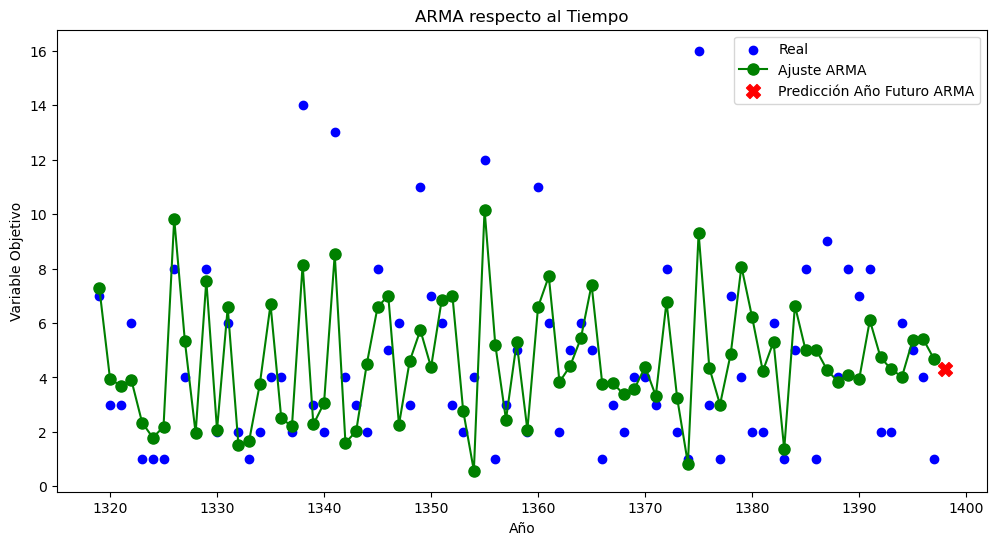

############
 
4.297198262031999
1
Predicción para el Digito 1 Futuro: 4.297198262031999
Root Mean Squared Error (RMSE): 2.4042513284482454
R^2 Score: 0.4598162884133311
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


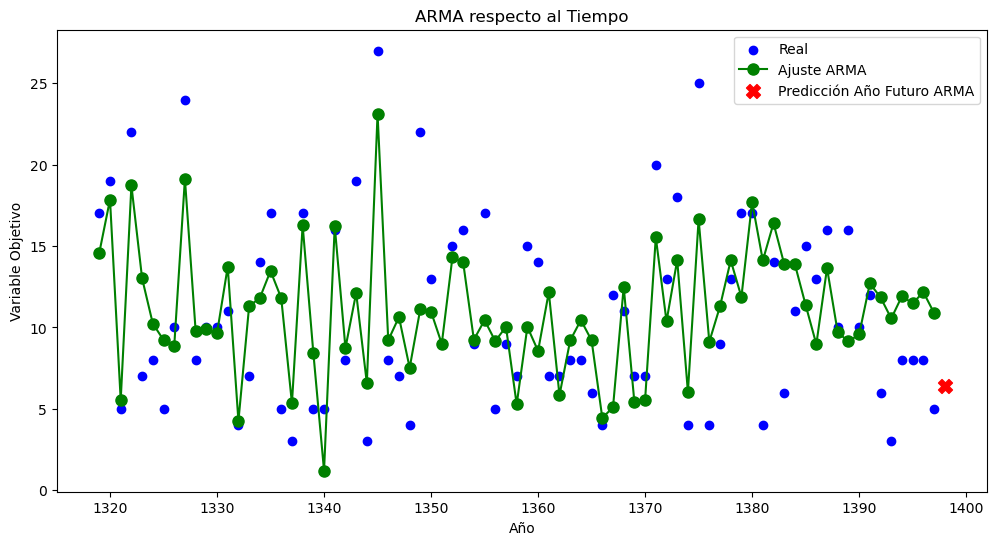

############
 
6.41865285892551
5
Predicción para el Digito 2 Futuro: 6.41865285892551
Root Mean Squared Error (RMSE): 4.030431597627889
R^2 Score: 0.5009443036783168
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


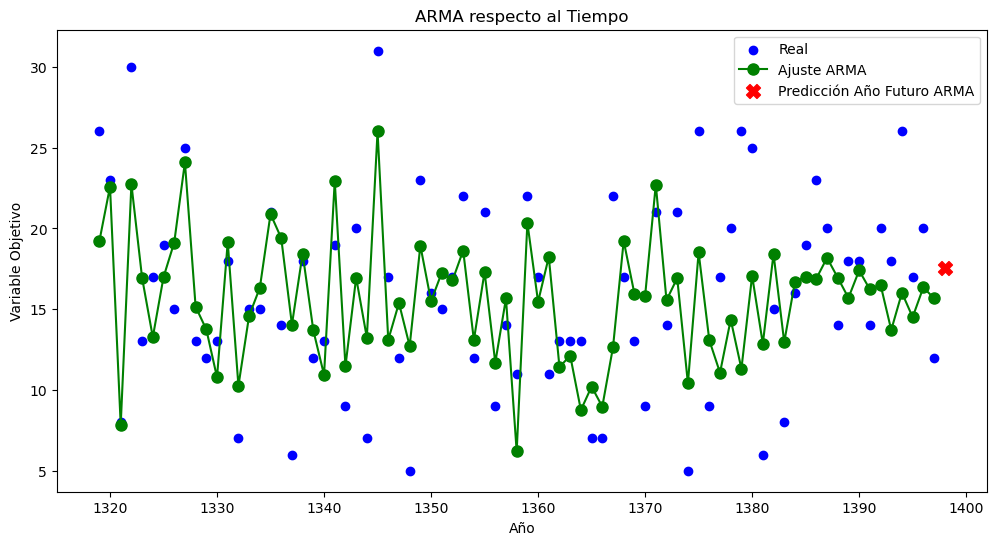

############
 
17.562556347848304
12
Predicción para el Digito 3 Futuro: 17.562556347848304
Root Mean Squared Error (RMSE): 4.446242681932305
R^2 Score: 0.44002727385921625
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


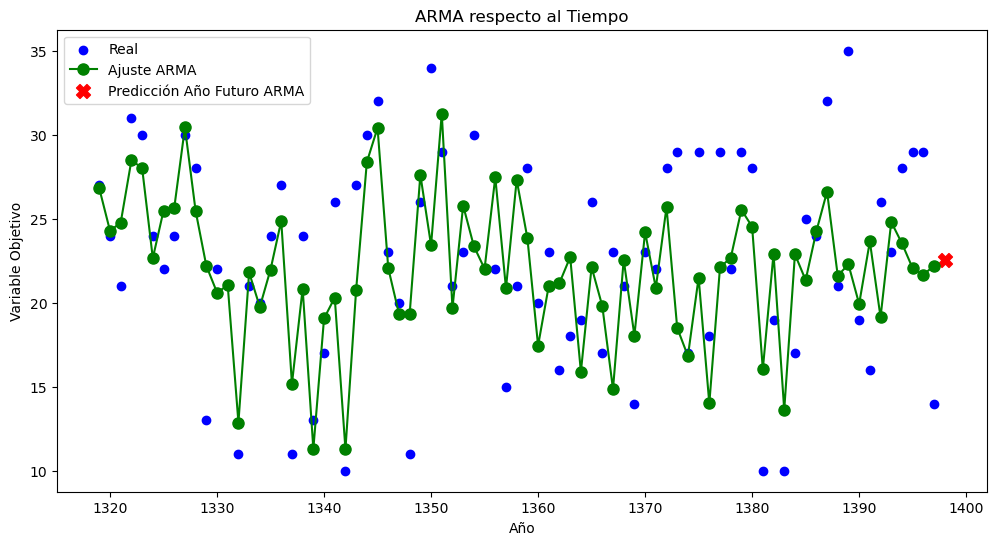

############
 
22.51629615700769
14
Predicción para el Digito 4 Futuro: 22.51629615700769
Root Mean Squared Error (RMSE): 4.594849649124211
R^2 Score: 0.4267142063036329
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


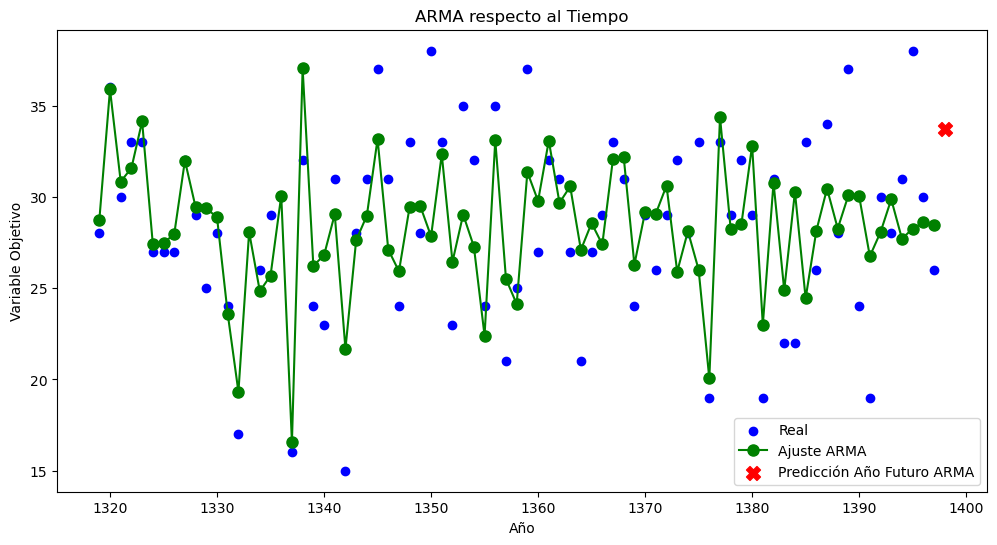

############
 
33.71426938140163
26
Predicción para el Digito 5 Futuro: 33.71426938140163
Root Mean Squared Error (RMSE): 3.683214068730255
R^2 Score: 0.47542864230053805
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


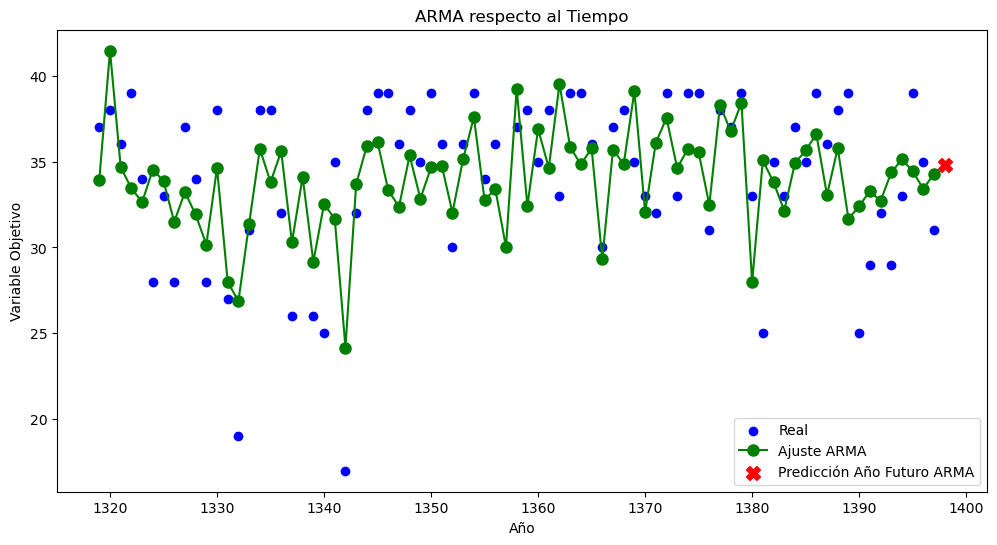

############
 
34.803111084130286
31
Predicción para el Digito 6 Futuro: 34.803111084130286
Root Mean Squared Error (RMSE): 3.637502889287075
R^2 Score: 0.4206969147545512
 


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#################################################

df_analisis = df1
digit_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']
order = (20, 0, 20) 
proximo_premio = df1["CONCURSO"][1]+1 # cORREGIR ACA

#################################################

# Crear un gráfico para cada dígito
for digit_column in digit_columns:
    years = np.array(df_analisis["CONCURSO"].astype(int))
    target_variable = df_analisis[digit_column].astype(int)

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    model_arma = ARIMA(y, order=order)
    result_arma = model_arma.fit()
    
    forecast_steps = 1
    forecast = result_arma.forecast(steps=forecast_steps)

    # Visualizar resultados
    plt.figure(figsize=(12, 6))

    # Variable objetivo real
    plt.scatter(X, y, label='Real', color='blue')

    # Predicciones del modelo ARIMA
    plt.plot(X, result_arma.fittedvalues , label='Ajuste ARMA', color='green', marker='o', markersize=8)

    # Predicciones para el tiempo futuro
    plt.scatter(proximo_premio, forecast, label='Predicción Año Futuro ARMA', color='red', marker='X', s=100)

    plt.xlabel('Año')
    plt.ylabel('Variable Objetivo')
    plt.title('ARMA respecto al Tiempo')
    plt.legend()
    plt.show()

    print("############")
    print(" ")
    print(f'Predicción para el Digito {digit_column[-1]} Futuro: {forecast.values[0]}')
    # Desviacion, entre mas cercana a 0 mejor
    mse = mean_squared_error(y , result_arma.fittedvalues)
    rmse = sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # R cuadrado entre mas cercano a 1 mejor
    r2 = r2_score(y , result_arma.fittedvalues)
    print(f'R^2 Score: {r2}')
    print(" ")